In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


In [199]:
data = np.loadtxt("exampledata4.txt")

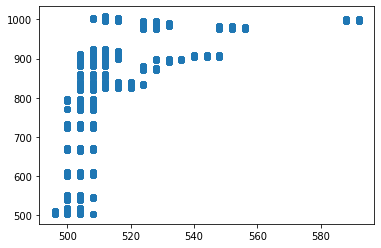

In [200]:
plt.scatter(data[:,0]*4, data[:,1]*4,alpha=0.2)

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


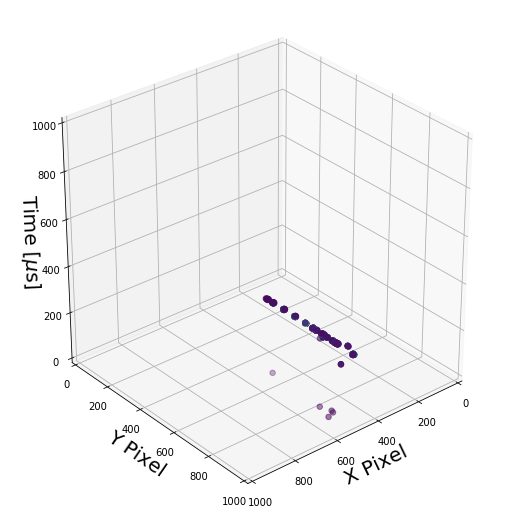

In [201]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
DQ = 1/data[:,3]
DQ[DQ<1]=0
size = np.ones(len(DQ))*30
size[DQ<1]=0
#ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=DQ,marker='s',c=DQ, cmap='Reds')
ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=size,c=DQ, cmap='viridis')

ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.set_zlim(0,1000)
#ax.set_zlim(300,304)
ax.view_init(None, 50)

ax.set_xlabel('X Pixel', fontsize=20, rotation=150)
ax.set_ylabel('Y Pixel', fontsize=20, rotation=150)
ax.set_zlabel(r'Time [$\mu$s]', fontsize=20, rotation=150)
plt.show()

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


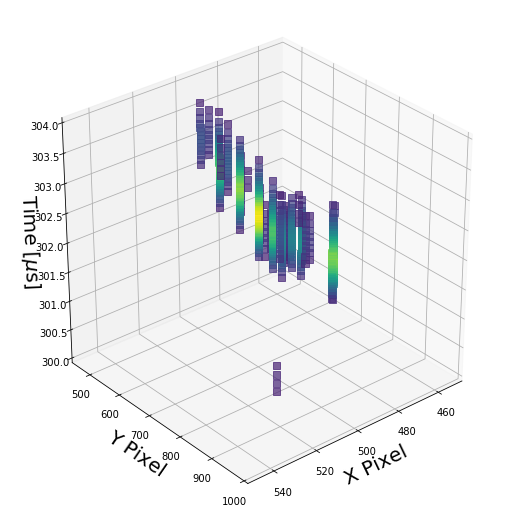

In [202]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
DQ = 1/data[:,3]
DQ[DQ<1]=0
size = np.ones(len(DQ))*50
size[DQ<6]=0
#ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=DQ,marker='s',c=DQ, cmap='Reds')
ax.scatter3D(data[:,0]*4, data[:,1]*4, data[:,2],s=size,c=DQ, cmap='viridis',marker='s',alpha=0.7)

ax.set_xlim(450,550)
ax.set_ylim(450,1000)
ax.set_zlim(290,310)
ax.set_zlim(300,304)
ax.view_init(None, 50)

ax.set_xlabel('X Pixel', fontsize=20, rotation=150)
ax.set_ylabel('Y Pixel', fontsize=20, rotation=150)
ax.set_zlabel(r'Time [$\mu$s]', fontsize=20, rotation=150)
plt.show()

In [203]:
allpairs = []
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    allpairs.append([xx,yy])
allpairs = np.array(allpairs)
unipairs = np.unique(allpairs, axis=0)
print(len(unipairs))

freq = []
for p in unipairs:
    xloc = p[0]
    yloc = p[1]
    hold = 0
    for x in range(0,len(data[:,0])):
        xx = data[:,0][x]
        yy = data[:,1][x]
        if (xx == xloc) and (yy == yloc):
            hold+=1
    freq.append(hold)
freq = np.array(freq)

194


In [204]:
freq

array([33, 33, 35, 35, 37, 36, 32, 36, 45, 36, 33, 33, 51, 38, 33, 39, 35,
       33, 34, 34, 32, 33, 33, 35, 36, 37, 36, 33, 37, 49, 39, 33, 32, 80,
       42, 33, 33, 87, 48, 32, 98, 48, 33, 80, 34, 33, 50, 34, 33, 44, 33,
       38, 37, 33, 33, 34, 32, 33, 33, 33, 33, 33, 33, 33, 32, 33, 33, 33,
       33, 33, 33, 33, 33, 34, 33, 33, 43, 33, 33, 42, 34, 35, 62, 37, 51,
       47, 34, 34, 62, 32, 34, 66, 33, 33, 45, 38, 33, 44, 37, 34, 33, 33,
       32, 33, 33, 33, 34, 52, 35, 32, 33, 32, 33, 34, 32, 33, 36, 41, 32,
       37, 36, 48, 37, 33, 33, 84, 84, 33, 32, 34, 33, 34, 33, 32, 32, 32,
       33, 34, 33, 33, 38, 38, 33, 34, 33, 33, 33, 32, 33, 33, 33, 32, 33,
       33, 33, 34, 34, 33, 32, 33, 33, 33, 33, 33, 33, 40, 36, 33, 32, 33,
       32, 33, 32, 32, 32, 33, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 37,
       33, 33, 33, 33, 32, 33, 32])

In [205]:
ff = np.where(freq > 40)
freq[ff]

array([45, 51, 49, 80, 42, 87, 48, 98, 48, 80, 50, 44, 43, 42, 62, 51, 47,
       62, 66, 45, 44, 52, 41, 48, 84, 84])

In [206]:
np.where(freq == 78)

(array([], dtype=int64),)

In [207]:
np.where(freq == max(freq))

(array([40]),)

In [208]:
unipairs[38]

array([126., 168.])

In [209]:
tes = []
tes2=[]
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    if (xx == 126) and (yy == 152):
        tes.append(data[:,2][x])
        tes2.append(data[:,3][x])

tes=np.array(tes)
tes2=np.array(tes2)

len(tes)

42

In [210]:
tes

array([ 19.   ,  49.   ,  81.   , 110.   , 142.   , 173.   , 203.   ,
       234.   , 265.   , 295.   , 302.626, 302.833, 302.974, 303.092,
       303.203, 303.313, 303.437, 303.586, 303.811, 311.   , 343.   ,
       374.   , 404.   , 436.   , 468.   , 500.   , 530.   , 560.   ,
       590.   , 621.   , 651.   , 681.   , 712.   , 743.   , 774.   ,
       804.   , 834.   , 864.   , 894.   , 926.   , 956.   , 987.   ])

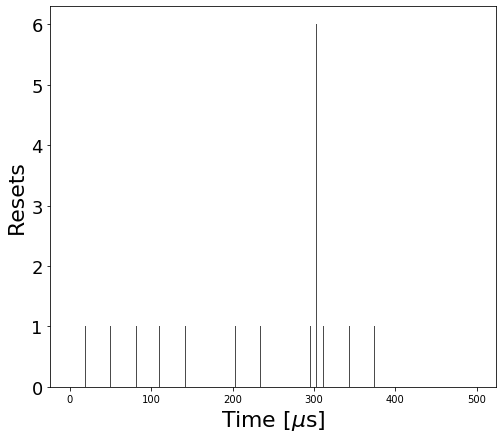

In [211]:
plt.figure(figsize=(8,7))
bins = np.arange(0,500,1)
#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)
#plt.hist(tes,rwidth=0.9,color='k',alpha=0.7)
#plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

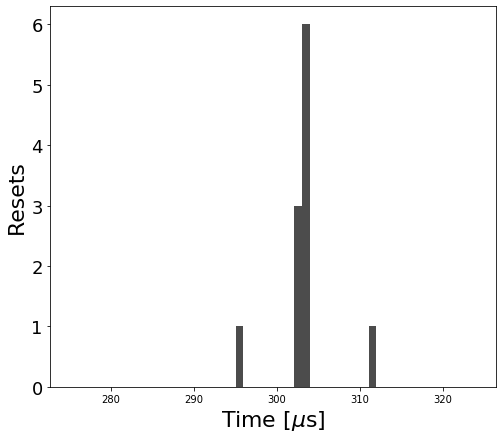

In [212]:
plt.figure(figsize=(8,7))
bins = np.arange(275,325,1)
#bins = np.arange(40,60,0.5)
plt.hist(tes,bins=bins,rwidth=0.9,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

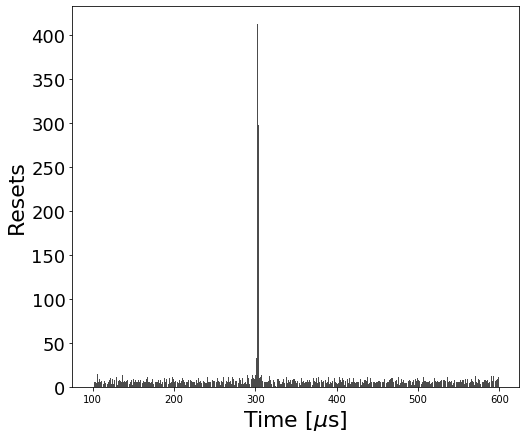

In [213]:
plt.figure(figsize=(8,7))
bins = np.arange(100,600,1)
#bins = np.arange(40,60,0.5)
plt.hist(data[:,2],bins=bins,rwidth=0.9,color='k',alpha=0.7)

plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

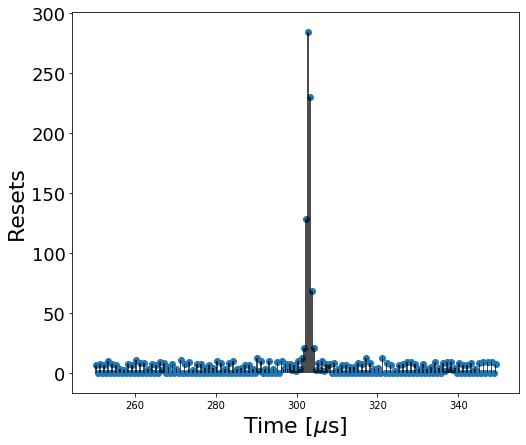

In [235]:
plt.figure(figsize=(8,7))
bins = np.arange(250,350,.5)
#bins = np.arange(40,60,0.5)
plt.hist(data[:,2],bins=bins,rwidth=0.9,color='k',alpha=0.7)

a,b = np.histogram(data[:,2],bins=bins)
bc = (b[1:] + b[:-1])/2
plt.scatter(bc,a)
plt.yticks(fontsize=18)
plt.xlabel(r"Time [$\mu$s]",fontsize=22)
plt.ylabel(r"Resets",fontsize=22)

plt.show()

In [236]:
a,b = np.histogram(data[:,2],bins=bins)
bc = (b[1:] + b[:-1])/2

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,bc,a,p0=[1,300,1])
print(popt)

[294.87490956 302.89695095   0.50384969]


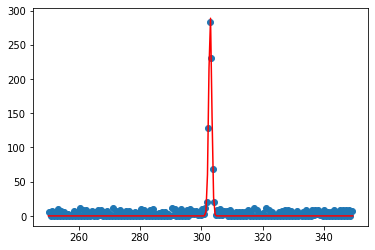

In [237]:
xval = bins#np.arange(10,90,0.1)
plt.scatter(bc,a)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')


In [238]:
(popt[2]**2*E_vel**3)/(2*DiffusionL)

832.7464869720208

In [246]:
bins = np.arange(250,350,1)


In [247]:
a,b = np.histogram(tes,bins=bins)
bc = (b[1:] + b[:-1])/2

In [248]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,bc,a,p0=[1,300,1])
print(popt)

[1.93432519e+01 3.03057874e+02 2.88954285e-01]


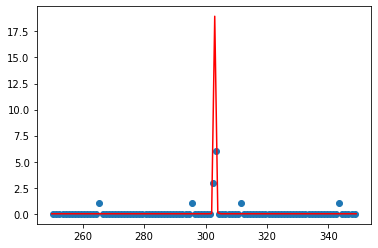

In [249]:
xval = bins#np.arange(10,90,0.1)
plt.scatter(bc,a)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')


In [250]:
E_vel = 1.648#; //mm/mus
DiffusionL = 682.23/1e6#;  //mm**2/mus
DiffusionT = 1315.86/1e6#; //mm**2/mus

In [251]:

(popt[2]**2*E_vel**3)/(2*DiffusionL)

273.8855314571888

In [252]:
(popt[2]**2*E_vel**2)/(2*DiffusionL)

166.19267685509033

In [253]:
tes = []
tes2=[]
for x in range(0,len(data[:,0])):
    xx = data[:,0][x]
    yy = data[:,1][x]
    if (xx == 126) and (yy == 152):
        tes.append(data[:,2][x])
        tes2.append(1/data[:,3][x])

tes=np.array(tes)
tes2=np.array(tes2)

len(tes)

42

(250, 350)

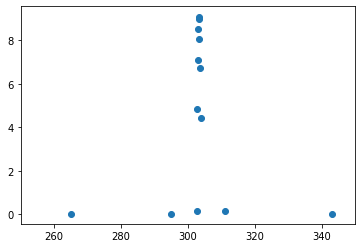

In [254]:
plt.scatter(tes,tes2)
plt.xlim(250,350)

In [255]:
popt,pcov = curve_fit(gaus,tes,tes2,p0=[1,300,1])
print(popt)

[  9.3094118  303.29297682   0.37582098]


(250, 350)

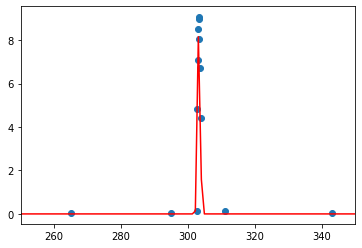

In [259]:
xval = np.arange(250,350,0.9)
plt.scatter(tes,tes2)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')
plt.xlim(250,350)

In [260]:
(popt[2]**2*E_vel**3)/(2*DiffusionL)

463.3112659438957

In [261]:
(popt[2]**2*E_vel**2)/(2*DiffusionL)

281.1354769077037